In [1]:
from konlpy.tag import Mecab

m = Mecab('C:\mecab\mecab-ko-dic')
m.pos('너튜브 에포나 정박모드 발탄')

[('너튜브', 'NNG'), ('에포', 'NNG'), ('나', 'JC'), ('정박모드', 'NNG'), ('발탄', 'NNG')]

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# 00. matplotlib 한글 깨짐 방지

In [3]:
import matplotlib.font_manager as fm

# 현재 설치된 폰트 리스트
# font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
# font_list[:]

# matplotlibrc 파일의 경로 확인
#print(mpl.matplotlib_fname())

# 해당 폴더로 이동하여 내부 파일 전부 삭제 (캐시 삭제)
# print(mpl.get_cachedir())

# plt.figure().add_subplot().set_title('안녕하세요')
# plt.show()

In [4]:
df = pd.read_csv('data/2022-02-24로아_final.csv')

# 01. 데이터 구조 파악

In [5]:
# row, col 파악
# 결측값이 들어오지 않아서 예정된 350개 보다 더 작은 340개의 데이터가 들어옴
df.shape

(340, 3)

In [6]:
df.isnull().sum()

title      0
content    0
comment    0
dtype: int64

In [7]:
# 전체 데이터 구조 파악
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    340 non-null    object
 1   content  340 non-null    object
 2   comment  340 non-null    object
dtypes: object(3)
memory usage: 8.1+ KB


In [8]:
# 상위 5개 데이터 확인
df.head()

,title,content,comment
0,뉴비 정박모드,정박 모드에서 출항 준비라는데 어떻게 해야되는건가요??,"항구앞바다로가서z키누르시고,사용하실배선택하고,선원집어넣고,출항하기누르시고,m키눌러서..."
1,뉴비 에포나 질문,스익 끝내서 너튜브 보고 따라하는중인데요모론토의 대리인 에포나퀘 하려면 해당 일반퀘...,에포나퀘스트는점핑권점핑권쓰고나면특정조건의에포나퀘스트제외하곤공유되어있을거에요.패치했는...
2,1415 뉴비 하익 홀나 이제 뭐하나용 ?ㅠ,15만원쯤 현질하고 하익으루 시작하니까 걍 몇일 하니까 1415 되더라고요 ㅠ;;*...,1.스킬포인트는천천히모으시면돼요!2.각인처음맞추는거면어려우셧을텐데수고많으셧어요!아브...
3,1440 뉴비 소서 데자뷰 리허설 질문이요!,곧 1445를 앞두고있는데요저번주에 리허설 2관까진 깻고 지금은 강화해서 데자뷰가 ...,네무족건가시는게좋아용~어렵지않습니다.데자뷰는
4,로아 이틀차 쌩뉴비애오 첫캐 워로드 잡고 스익중인데,1. 원래 워로드에 하익도 쓰려고 했는데 3/16까지 1302 못찍을 거 같으면 점...,워로드를스익으로밀면서본캐하실꺼면키워보고싶은캐릭이나스킬멋지거나워로드대신에고민했던걸하시...


In [9]:
# 혹시나 중복되어 들어온 데이터가 있나 확인
df = df.drop_duplicates(['title', 'content'], keep='first')

In [10]:
# 기존값과 변화 없으므로 중복된 데이터가 없다고 판정
df.shape

(340, 3)

# 데이터 전처리
0. [자연어 처리 참고](https://wikidocs.net/92961)
1. 형태소 분석기
    - KoNLPY 설치
        - [KoNLPy API](https://konlpy.org/ko/v0.4.3/morph/)
        - [KoNLPY 설치 참고](https://konlpy.org/en/latest/install/)
        - Windows에서 KoNLPY를 사용하려면 jdk1.7 이상이 설치되어 있어야 함
            - [jdk1.8 설치](https://www.oracle.com/java/technologies/downloads/#java8-windows)
        - pip install --upgrade pip
        - [JPype 다운로드](https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype)
        - pip install JPype1-1.3.0-cp37-cp37-win_amd64.whl
            - 0.5.7 이상, 본인 파이썬 버전, 윈도우 32 or 64 bit에 맞춰서 설치
            - whl 파일을 다운로드 받은 경로에서 해당 명령어 실행   
        - pip install konlpy
    - Mecab 설치
        - [Mecab API](https://konlpy-ko.readthedocs.io/ko/v0.6.0/api/konlpy.tag/#mecab-class)
        - [Mecab 설치 참고](https://lsjsj92.tistory.com/612)
        - [Mecab tag표](https://openuiz.tistory.com/90)
        - [mecab-ko-msvc](https://github.com/Pusnow/mecab-ko-msvc/releases/tag/release-0.9.2-msvc-3) => 윈도우 bit에 맞춰서 다운로드
        - [mecab-ko-dic-msvc.zip](https://github.com/Pusnow/mecab-ko-dic-msvc/releases/tag/mecab-ko-dic-2.1.1-20180720-msvc-2) => mecab-ko-dic-msvc.zip 다운로드
        - C:/에 mecab 디렉토리 생성 => 위 두 zip파일 mecab 디렉토리에 압축해제
        - [mecab_python-0.996_ko_0.9.2_msvc-cp37-cp37m-win_amd64.whl](https://github.com/Pusnow/mecab-python-msvc/releases/tag/mecab_python-0.996_ko_0.9.2_msvc-2)
            - 본인 파이썬 버젼, 윈도우 32 or 64 bit에 맞춰서 설치 (3.8 이상 지원 X)
            - whl 파일을 다운로드 받은 경로에서 해당 명령어 실행
2. 띄어쓰기 확인 패키지
    - PyKoSpacing 설치
        - pip install git+https://github.com/haven-jeon/PyKoSpacing.git
 

In [11]:
from konlpy.tag import Mecab
from pykospacing import Spacing
import re

# Mecab은 일반적인 Konlpy의 토크나이저와는 다르게 dicpath를 파라미터로 지정해줘야함
# mecab-ko-dic-msvc.zip의 압축을 푼 경로에 있음
m = Mecab('C:\mecab\mecab-ko-dic')

t = m.morphs(u'아버지가방에들어가신다')

# 띄어쓰기 패키지 호출
spacing = Spacing()

m.pos('에포나')

[('에포', 'NNG'), ('나', 'JC')]

In [12]:
# 데이터를 붙이는 도중에 단어끼리 붙어버리는 경우가 있어서 공백 추가
df['title_content'] = df['title'].values + ' ' + df['content'].values

## Case-01. 제목, 본문 (한글, 숫자, 띄어쓰기 처리 O)
- 형태소 분석기 : **Mecab**
- 띄어쓰기 처리 : **Spacing**
- content는 답변 위주의 데이터라 1차적으로 제목, 본문 내용으로만 처리

In [13]:
# 한글, 숫자 데이터만 남겨둠
df['ko_num_title_content'] = df['title_content'].apply(lambda x: re.sub('[^0-9가-힣\s]','',x))

# ko_num_title_content 컬럼의 값들을 list로 만듬
ko_num_title_content_list = list(df['ko_num_title_content'].values)

In [14]:
df.head()

,title,content,comment,title_content,ko_num_title_content
0,뉴비 정박모드,정박 모드에서 출항 준비라는데 어떻게 해야되는건가요??,"항구앞바다로가서z키누르시고,사용하실배선택하고,선원집어넣고,출항하기누르시고,m키눌러서...",뉴비 정박모드 정박 모드에서 출항 준비라는데 어떻게 해야되는건가요??,뉴비 정박모드 정박 모드에서 출항 준비라는데 어떻게 해야되는건가요
1,뉴비 에포나 질문,스익 끝내서 너튜브 보고 따라하는중인데요모론토의 대리인 에포나퀘 하려면 해당 일반퀘...,에포나퀘스트는점핑권점핑권쓰고나면특정조건의에포나퀘스트제외하곤공유되어있을거에요.패치했는...,뉴비 에포나 질문 스익 끝내서 너튜브 보고 따라하는중인데요모론토의 대리인 에포나퀘 ...,뉴비 에포나 질문 스익 끝내서 너튜브 보고 따라하는중인데요모론토의 대리인 에포나퀘 ...
2,1415 뉴비 하익 홀나 이제 뭐하나용 ?ㅠ,15만원쯤 현질하고 하익으루 시작하니까 걍 몇일 하니까 1415 되더라고요 ㅠ;;*...,1.스킬포인트는천천히모으시면돼요!2.각인처음맞추는거면어려우셧을텐데수고많으셧어요!아브...,1415 뉴비 하익 홀나 이제 뭐하나용 ?ㅠ 15만원쯤 현질하고 하익으루 시작하니까...,1415 뉴비 하익 홀나 이제 뭐하나용 15만원쯤 현질하고 하익으루 시작하니까 걍...
3,1440 뉴비 소서 데자뷰 리허설 질문이요!,곧 1445를 앞두고있는데요저번주에 리허설 2관까진 깻고 지금은 강화해서 데자뷰가 ...,네무족건가시는게좋아용~어렵지않습니다.데자뷰는,1440 뉴비 소서 데자뷰 리허설 질문이요! 곧 1445를 앞두고있는데요저번주에 리...,1440 뉴비 소서 데자뷰 리허설 질문이요 곧 1445를 앞두고있는데요저번주에 리허...
4,로아 이틀차 쌩뉴비애오 첫캐 워로드 잡고 스익중인데,1. 원래 워로드에 하익도 쓰려고 했는데 3/16까지 1302 못찍을 거 같으면 점...,워로드를스익으로밀면서본캐하실꺼면키워보고싶은캐릭이나스킬멋지거나워로드대신에고민했던걸하시...,로아 이틀차 쌩뉴비애오 첫캐 워로드 잡고 스익중인데 1. 원래 워로드에 하익도 쓰려...,로아 이틀차 쌩뉴비애오 첫캐 워로드 잡고 스익중인데 1 원래 워로드에 하익도 쓰려고...


In [15]:
# 띄어쓰기 처리해준 값들을 담을 list
spacing_ko_num_title_content_list = []

# PyKoSpacing를 사용하여 띄어쓰기 적용
for i in ko_num_title_content_list:
    spacing_ko_num_title_content_list.append(spacing(i))

In [16]:
# 띄어쓰기 적용한 문장의 명사들을 담을 리스트
spacing_ko_num_title_content_word_lst = []

# 띄어쓰기 적용한 리스트의 명사들만 따로 담음
for word in spacing_ko_num_title_content_list:
    for i in range(len(m.nouns(word))):
        spacing_ko_num_title_content_word_lst.append(m.nouns(word)[i])

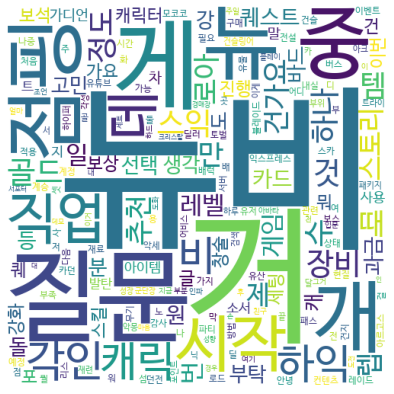

In [17]:
# Counter 라이브러리로 단어의 빈도수 체크 후 많은 순서대로 내림차순 정렬
from collections import Counter
count = Counter(spacing_ko_num_title_content_word_lst)
words_dict = dict(count)
words_dict = sorted(words_dict.items(), key=lambda item: item[1], reverse=True)

# 정렬 후 list로 반환되어 다시 dict로 변환
words_dict = dict(count)

from wordcloud import WordCloud
# 폰트를 프로젝트 폴더에 그냥 복사해서 바로 불러왔습니다.
wordcloud = WordCloud(font_path='NanumBarunGothic.ttf', width=500, height=500, background_color='white').generate_from_frequencies(words_dict)

# WordCloud 출력
plt.figure(figsize=(7,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [18]:
# WordCloud를 토대로 불용어 선정하여 다시 작성
stop_words={'비', '익', '것', '데', '개',
            '만', '지', '노', '나', '등',
            '디', '부', '지', '저', '내',
            '후', '딜', '막', '이게', '건',
            '원', '여', '포', '글', '도', '닉'}

for word in stop_words:
    words_dict.pop(word)

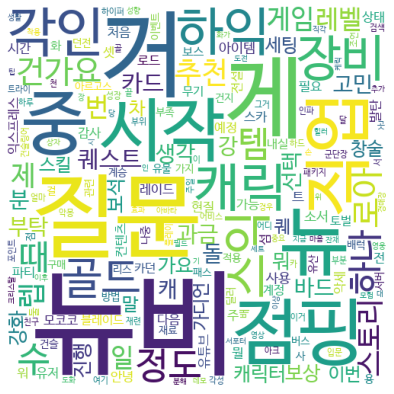

In [19]:
from wordcloud import WordCloud
# 폰트를 프로젝트 폴더에 그냥 복사해서 바로 불러왔습니다.
wordcloud = WordCloud(font_path='NanumBarunGothic.ttf', 
                      min_font_size=7, max_font_size=150,
                      margin=3, width=500, height=500,
                      background_color='white').generate_from_frequencies(words_dict)

# WordCloud 출력
plt.figure(figsize=(7,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Case-01. 결론
- WordCloud에 더티 데이터가 너무 많다.
    - 게임 관련 게시글인 만큼 고유명사가 많아서 PyKoSpacing을 적용하면 더티 데이터가 많이 발생한다.
    - 고유명사가 워낙 많으므로 해당 명사들을 따로 처리해줘야 한다.

## Case-02. 제목, 본문 (한글, 숫자, 띄어쓰기 처리 X, 별도의 고유명사 처리)
- 형태소 분석기 : **Mecab**
- content는 답변 위주의 데이터라 1차적으로 제목, 본문 내용으로만 처리
- Mecab 사용자 Dict 설정


In [20]:
# 한글, 숫자 데이터만 남겨둠
df['ko_num_title_content'] = df['title_content'].apply(lambda x: re.sub('[^0-9가-힣\s]','',x))

# ko_num_title_content 컬럼의 값들을 list로 만듬
ko_num_title_content_list = list(df['ko_num_title_content'].values)

In [21]:
# 명사들을 담을 리스트
ko_num_title_content_word_lst = []

for word in ko_num_title_content_list:
    for i in range(len(m.nouns(word))):
        ko_num_title_content_word_lst.append(m.nouns(word)[i])

In [22]:
# 불용어
stop_words='뉴비 질문 그거 건 드 때 만 번 캐 차 부탁 추천 사 안녕 \
            둘 디 막 입문 처음 건가요 데 팁 방법 필요 뭘 트 여 등등 후 \
            이게 노 이후 포 만약 내 건지 쌩 지 나 다음 방향 카 건슬 로아 \
            로스트아크 중 게임 시작 개 캐릭터 뭐 퀘 정도 여기 조언 현재 고민 \
            저 생각 글 제 것 까지'

# 불용어 적용
ko_num_title_content_word_lst = [word for word in ko_num_title_content_word_lst
                                    if not word in stop_words]

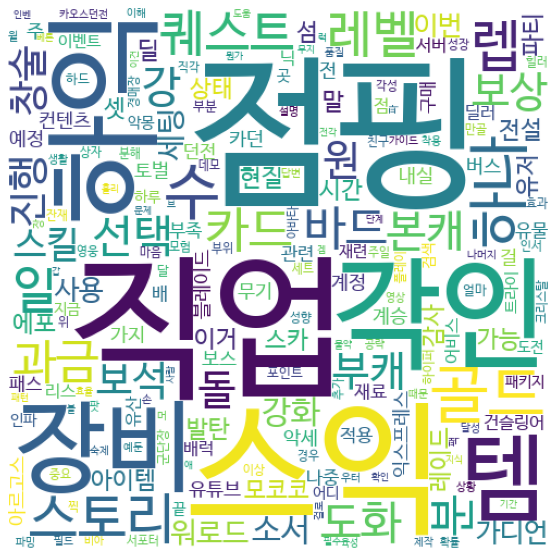

In [23]:
# Counter 라이브러리로 단어의 빈도수 체크 후 많은 순서대로 내림차순 정렬
from collections import Counter
count = Counter(ko_num_title_content_word_lst)
words_dict = dict(count)
words_dict = sorted(words_dict.items(), key=lambda item: item[1], reverse=True)

# 정렬 후 list로 반환되어 다시 dict로 변환
words_dict = dict(count)

from wordcloud import WordCloud
# 폰트를 프로젝트 폴더에 그냥 복사해서 바로 불러왔습니다.
wordcloud = WordCloud(font_path='NanumBarunGothic.ttf', 
                      min_font_size=7, max_font_size=150,
                      margin=3, width=500, height=500,
                      background_color='white').generate_from_frequencies(words_dict)

# WordCloud 출력
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

- Case-02. 결론
    - 띄어쓰기를 하지 않고 Mecab의 사용자 Dictionary를 사용하니 확실히 더티 데이터가 줄어듦
    - 직업 고민에 대한 고민이 역시 많고, 뉴비들에게 하익, 스익과 같은 점핑 익스프레스 시스템이 생각보다 어렵게 느껴짐

## Case-03. 제목, 본문 (한글, 숫자, 띄어쓰기 처리 X, 별도의 명사 처리 X)
- 형태소 분석기 : **soynlp**
    - 비지도 학습 접근법을 지향하는 형태소 분석기
    - 여러 개의 문서로부터 학습한 통계 정보를 이용하여 작동
    - 패턴을 이용하여 단어를 추출하기 때문에 어느 정도 규모가 있는 동일 집단 문서에서 잘 작동
- content는 답변 위주의 데이터라 1차적으로 제목, 본문 내용으로만 처리
- soynlp 설치
    - [soynlp Github Guide](https://github.com/lovit/soynlp) <= 매우 상세
    - pip install soynlp

In [24]:
# 한글, 숫자 데이터만 남겨둠
df['ko_num_title_content'] = df['title_content'].apply(lambda x: re.sub('[^0-9가-힣\s]','',x))

# ko_num_title_content 컬럼의 값들을 list로 만듬
ko_num_title_content_list = list(df['ko_num_title_content'].values)

In [25]:
df.head()

,title,content,comment,title_content,ko_num_title_content
0,뉴비 정박모드,정박 모드에서 출항 준비라는데 어떻게 해야되는건가요??,"항구앞바다로가서z키누르시고,사용하실배선택하고,선원집어넣고,출항하기누르시고,m키눌러서...",뉴비 정박모드 정박 모드에서 출항 준비라는데 어떻게 해야되는건가요??,뉴비 정박모드 정박 모드에서 출항 준비라는데 어떻게 해야되는건가요
1,뉴비 에포나 질문,스익 끝내서 너튜브 보고 따라하는중인데요모론토의 대리인 에포나퀘 하려면 해당 일반퀘...,에포나퀘스트는점핑권점핑권쓰고나면특정조건의에포나퀘스트제외하곤공유되어있을거에요.패치했는...,뉴비 에포나 질문 스익 끝내서 너튜브 보고 따라하는중인데요모론토의 대리인 에포나퀘 ...,뉴비 에포나 질문 스익 끝내서 너튜브 보고 따라하는중인데요모론토의 대리인 에포나퀘 ...
2,1415 뉴비 하익 홀나 이제 뭐하나용 ?ㅠ,15만원쯤 현질하고 하익으루 시작하니까 걍 몇일 하니까 1415 되더라고요 ㅠ;;*...,1.스킬포인트는천천히모으시면돼요!2.각인처음맞추는거면어려우셧을텐데수고많으셧어요!아브...,1415 뉴비 하익 홀나 이제 뭐하나용 ?ㅠ 15만원쯤 현질하고 하익으루 시작하니까...,1415 뉴비 하익 홀나 이제 뭐하나용 15만원쯤 현질하고 하익으루 시작하니까 걍...
3,1440 뉴비 소서 데자뷰 리허설 질문이요!,곧 1445를 앞두고있는데요저번주에 리허설 2관까진 깻고 지금은 강화해서 데자뷰가 ...,네무족건가시는게좋아용~어렵지않습니다.데자뷰는,1440 뉴비 소서 데자뷰 리허설 질문이요! 곧 1445를 앞두고있는데요저번주에 리...,1440 뉴비 소서 데자뷰 리허설 질문이요 곧 1445를 앞두고있는데요저번주에 리허...
4,로아 이틀차 쌩뉴비애오 첫캐 워로드 잡고 스익중인데,1. 원래 워로드에 하익도 쓰려고 했는데 3/16까지 1302 못찍을 거 같으면 점...,워로드를스익으로밀면서본캐하실꺼면키워보고싶은캐릭이나스킬멋지거나워로드대신에고민했던걸하시...,로아 이틀차 쌩뉴비애오 첫캐 워로드 잡고 스익중인데 1. 원래 워로드에 하익도 쓰려...,로아 이틀차 쌩뉴비애오 첫캐 워로드 잡고 스익중인데 1 원래 워로드에 하익도 쓰려고...


In [74]:
# WordExtractor의 3가지 알고리즘
# Branching Entropy
# Accessor Variety
# Cohesion Score
# WordExtractor를 이용하여 세개의 알고리즘에 대해 계산한 각 단어별 score를 집계
from soynlp.word import WordExtractor

we = WordExtractor(min_frequency=100,
                    min_cohesion_forward=0.05,
                    min_right_branching_entropy=0.0
)
we.train(df['ko_num_title_content'].values)
words = we.extract()

training was done. used memory 0.486 Gb
all cohesion probabilities was computed. # words = 12
all branching entropies was computed # words = 2611
all accessor variety was computed # words = 2611


In [75]:
words

{'그': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=2.90809278118369, right_branching_entropy=1.6094379124341005, left_accessor_variety=26, right_accessor_variety=5, leftside_frequency=175, rightside_frequency=0),
 '해': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=2.9782378968669194, right_branching_entropy=1.0397207708399179, left_accessor_variety=29, right_accessor_variety=3, leftside_frequency=199, rightside_frequency=0),
 '은': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=0, right_branching_entropy=3.9692962184811993, left_accessor_variety=0, right_accessor_variety=64, leftside_frequency=0, rightside_frequency=311),
 '시': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=2.843863216574641, right_branching_entropy=2.0101626586396124, left_accessor_variety=20, right_accessor_variety=8, leftside_frequency=135, rightside_frequency=0),
 '점': Scores(cohesion_forward=0, cohesion_backward=0, le

In [76]:
# 한글은 L + R의 언어 패턴을 가지고 있음
# 그 중 L부분에 해당하는 명사, 형용사 등을 가지고 옴
from soynlp.tokenizer import LTokenizer

cohesion_score = {word:score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores=cohesion_score)

In [78]:
# 위에서 생성한 토크나이저를 
# 해당 컬럼에 적용
df['token'] = df['ko_num_title_content'].apply(lambda x: tokenizer.tokenize(x, remove_r=True))

soy_token = []
for i in df['token'].values:
    for k in i:
        soy_token.append(k)

In [85]:
# 불용어
stop_words='뉴비 질문 더 제가 좀 부탁드립니다 하나 싶어서 왜 뭔가 전부 꼭 시작한지 \
            되나요 되는 너무 하면 해야 같아서 도와주세요 안녕하세요 잘 지금 그냥 \
            하는 관련 될까요 근데 이번에 정말 있고 중에 같이 모르고 및 다시 아니면 \
            다른 어떤 된 감사하겠습니다 좋을지 하루 하려고 맞추고 했는데 \
            같은데 알려주세요 원래 궁금합니다 뭐가 그리고 바로 보니까 있을까요 \
            또 오늘 나머지 하나요 일단 이제 해서 있는데 써서 첫 있어서 있나요 아직 \
            어떻게 혹시 계속 이미 따로 쓰고 어제 보니까 이것저것 우선 모르겠네요 \
            없이 어떤게 알려주시면 모르겠습니다 매일 저는 보고 있는지 맞는지 계정 \
            있습니다 빨리 어떤게 있다고 싶은데 부탁드려요 대충 적용해서 여기서 \
            맞나요 갈 완전 있으면 입니다 없어서 하면서 추천좀 좋은 할 하고 많이 \
            이렇게 걍 그래도 좋나요 1 33333 3333 3 몇가지 가도 해야하는지'

# 불용어 적용
soy_token = [word for word in soy_token if not word in stop_words]

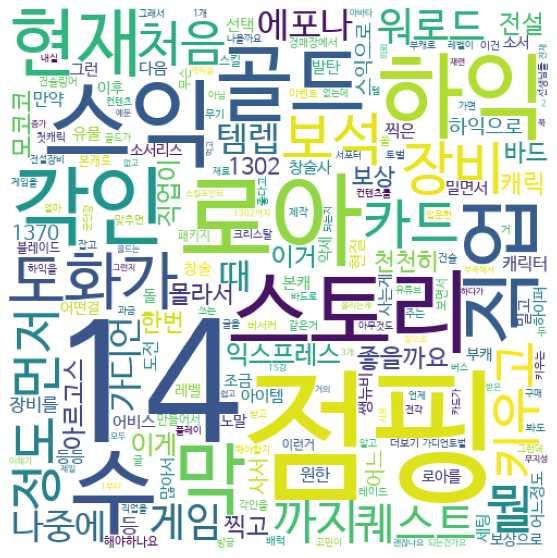

In [86]:
# Counter 라이브러리로 단어의 빈도수 체크 후 많은 순서대로 내림차순 정렬
from collections import Counter
count = Counter(soy_token)
words_dict = dict(count)
words_dict = sorted(words_dict.items(), key=lambda item: item[1], reverse=True)

# 정렬 후 list로 반환되어 다시 dict로 변환
words_dict = dict(count)

from wordcloud import WordCloud
# 폰트를 프로젝트 폴더에 그냥 복사해서 바로 불러왔습니다.
wordcloud = WordCloud(font_path='NanumBarunGothic.ttf', 
                      min_font_size=7, max_font_size=150,
                      margin=3, width=500, height=500,
                      background_color='white').generate_from_frequencies(words_dict)

# WordCloud 출력
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

- Case-03. 결론
    - 비지도 학습 기반이라 별도의 명사처리를 하지 않아도 고유 명사들에 상대적으로 좋은 성능을 보여줌

## Case-04. 제목, 본문 (한글, 숫자, 띄어쓰기 처리 X, 별도의 명사 처리 O)
- 형태소 분석기 : **soynlp**
    - 비지도 학습 접근법을 지향하는 형태소 분석기
    - 여러 개의 문서로부터 학습한 통계 정보를 이용하여 작동
    - 패턴을 이용하여 단어를 추출하기 때문에 어느 정도 규모가 있는 동일 집단 문서에서 잘 작동
- content는 답변 위주의 데이터라 1차적으로 제목, 본문 내용으로만 처리
- soynlp 설치
    - [soynlp Github Guide](https://github.com/lovit/soynlp) <= 매우 상세
    - pip install soynlp

In [113]:
# 한글, 숫자 데이터만 남겨둠
df['ko_num_title_content'] = df['title_content'].apply(lambda x: re.sub('[^0-9가-힣\s]','',x))

# ko_num_title_content 컬럼의 값들을 list로 만듬
ko_num_title_content_list = list(df['ko_num_title_content'].values)

In [120]:
from soynlp.noun import LRNounExtractor_v2
from soynlp.word import WordExtractor
from soynlp.tokenizer import LTokenizer

# 명사만 추출
ne = LRNounExtractor_v2(verbose=True)
ko_num_title_content_nouns_list = ne.train_extract(ko_num_title_content_list)


we = WordExtractor(min_frequency=100,
                    min_cohesion_forward=0.05,
                    min_right_branching_entropy=0.0
)

we.train(ko_num_title_content_nouns_list)
words = we.extract()

noun_score = {word:score.score for noun, score in nouns.items()}
cohesion_score = {word:score.cohesion_forward for word, score in words.items()}

combine_score = {noun:score + cohesion_score.get(noun, 0)
                    for noun, score in noun_score.items()
                }

combine_score.update(
    {subword:cohesion for subword, cohesion in cohesion_score.items()
        if not (subword in combined_score)
    }
)

tokenizer = LTokenizer(scores=combine_score)

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 7713 from 340 sents. mem=0.487 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=13776, mem=0.483 Gb
[Noun Extractor] batch prediction was completed for 2718 words
[Noun Extractor] checked compounds. discovered 520 compounds
[Noun Extractor] postprocessing detaching_features : 1275 -> 1125
[Noun Extractor] postprocessing ignore_features : 1125 -> 1085
[Noun Extractor] postprocessing ignore_NJ : 1085 -> 1076
[Noun Extractor] 1076 nouns (520 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.485 Gb                    
[Noun Extractor] 50.75 % eojeols are covered
training was done. used memory 0.485 Gb
all cohesion probabilities was computed. # words = 0
all branching entropies was computed # words = 0
all accessor variety was computed #

In [121]:
df['noun_token'] = df['ko_num_title_content'].apply(lambda x: tokenizer.tokenize(x, remove_r=True))

soy_noun_token = []
for i in df['noun_token'].values:
    for k in i:
        soy_noun_token.append(k)

In [122]:
# 불용어
stop_words='뉴비 질문 더 제가 좀 부탁드립니다 하나 싶어서 왜 뭔가 전부 꼭 시작한지 \
            되나요 되는 너무 하면 해야 같아서 도와주세요 안녕하세요 잘 지금 그냥 \
            하는 관련 될까요 근데 이번에 정말 있고 중에 같이 모르고 및 다시 아니면 \
            다른 어떤 된 감사하겠습니다 좋을지 하루 하려고 맞추고 했는데 \
            같은데 알려주세요 원래 궁금합니다 뭐가 그리고 바로 보니까 있을까요 \
            또 오늘 나머지 하나요 일단 이제 해서 있는데 써서 첫 있어서 있나요 아직 \
            어떻게 혹시 계속 이미 따로 쓰고 어제 보니까 이것저것 우선 모르겠네요 \
            없이 어떤게 알려주시면 모르겠습니다 매일 저는 보고 있는지 맞는지 계정 \
            있습니다 빨리 어떤게 있다고 싶은데 부탁드려요 대충 적용해서 여기서 \
            맞나요 갈 완전 있으면 입니다 없어서 하면서 추천좀 좋은 할 하고 많이 \
            이렇게 걍 그래도 좋나요 1 33333 3333 3 몇가지 가도 해야하는지'



# 불용어 적용
soy_noun_token = [word for word in soy_noun_token if not word in stop_words]

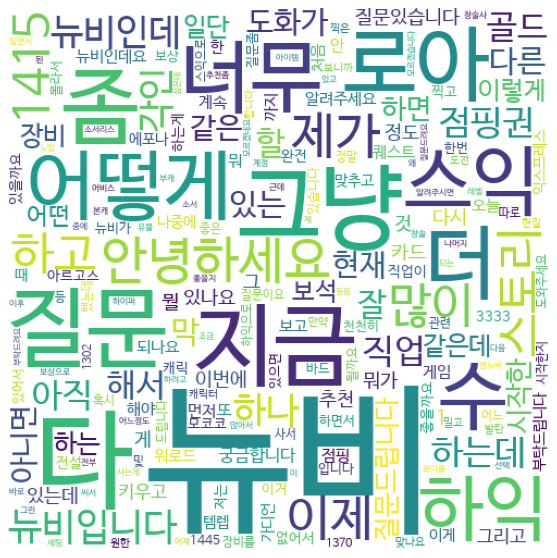

In [123]:
# Counter 라이브러리로 단어의 빈도수 체크 후 많은 순서대로 내림차순 정렬
from collections import Counter
count = Counter(soy_noun_token)
words_dict = dict(count)
words_dict = sorted(words_dict.items(), key=lambda item: item[1], reverse=True)

# 정렬 후 list로 반환되어 다시 dict로 변환
words_dict = dict(count)

from wordcloud import WordCloud
# 폰트를 프로젝트 폴더에 그냥 복사해서 바로 불러왔습니다.
wordcloud = WordCloud(font_path='NanumBarunGothic.ttf', 
                      min_font_size=7, max_font_size=150,
                      margin=3, width=500, height=500,
                      background_color='white').generate_from_frequencies(words_dict)

# WordCloud 출력
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

- Case-04. 결론
    - Case-03과 별 차이가 없음
    - 명사를 별도로 처리해줬는데 잘못한 건지 구분이 거의 되지 않음
    